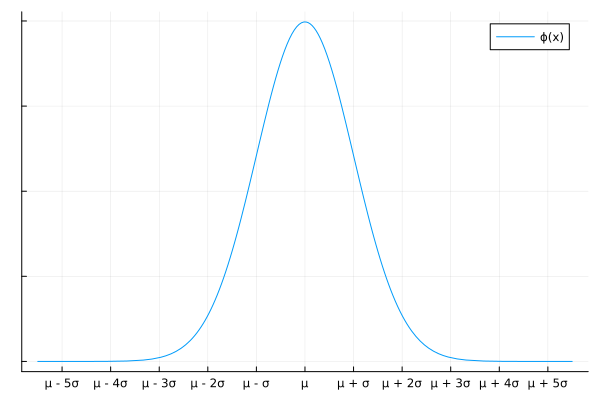

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

plot(Normal(), -5.5, 5.5; label="ϕ(x)")
plot!(xtick=(-5:5, ["μ - " .* [string.(5:-1:2); ""] .* "σ"; "μ"; "μ + " .* [""; string.(2:5)] .* "σ"]))
plot!(ytick=(0:0.1:1, fill("", 11)))

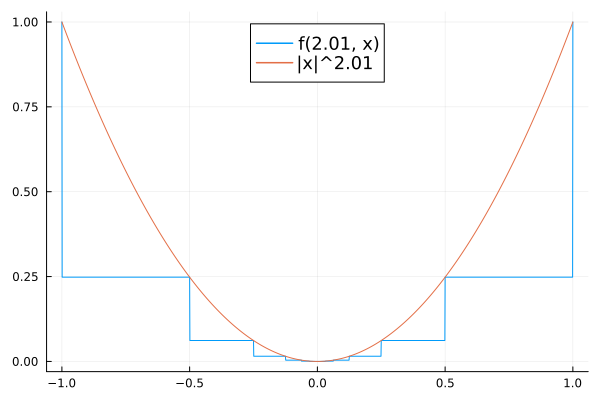

In [2]:
using Plots

f(r, x) = x == 0 ? zero(x) : (2.0^floor(Int, log(2, abs(x))))^r

r = 2.01
xs = range(-1, 1, 2001)
plot(xs, x -> f(r, x); label="f($r, x)")
plot!(xs, x -> abs(x)^r; label="|x|^$r")
plot!(legend=:top, legendfontsize=12)

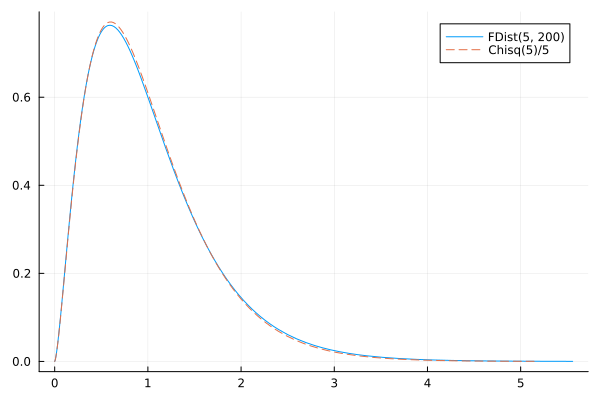

In [3]:
using Distributions
using StatsPlots
default(fmt=:png)

plot(FDist(5, 150); label="FDist(5, 200)")
plot!(Chisq(5)/5; label="Chisq(5)/5", ls=:dash)
#plot!(xlim=(-0.2, 10), ylim=(-0.2, 3))

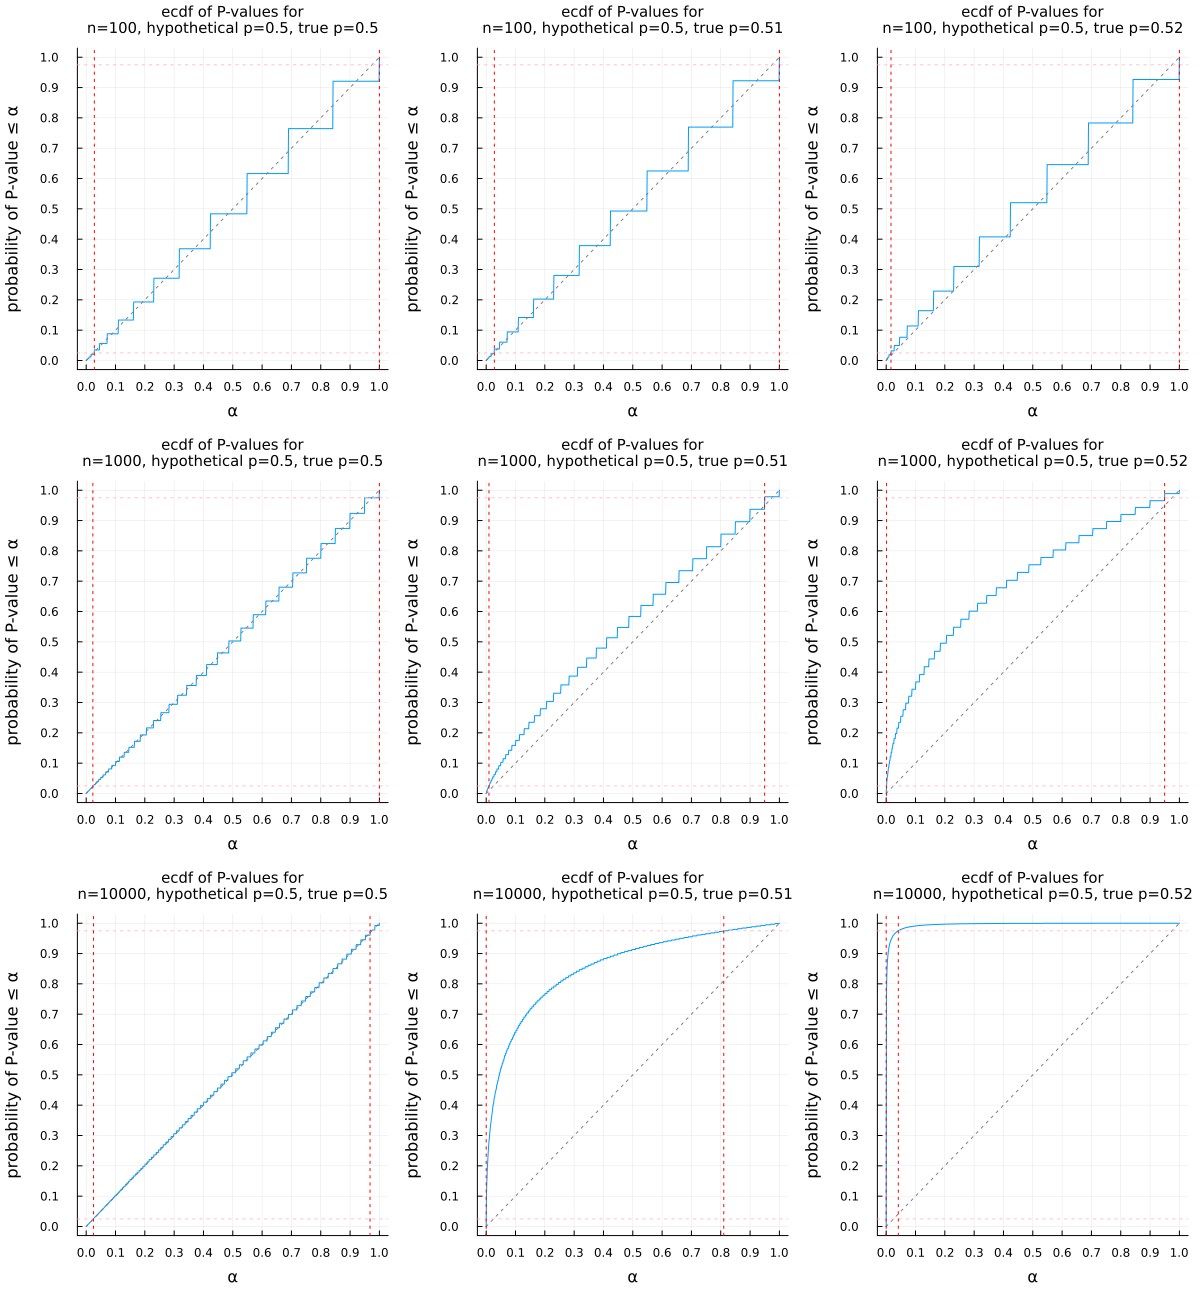

In [4]:
using Distributions
using StatsPlots
default(fmt=:png)

myecdf(A, x) = count(≤(x), A)/length(A)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_wilson(k, n, p)
    z = safediv(k - n*p, √(n*p*(1-p)))
    min(1, 2ccdf(Normal(), abs(z)))
end

function plot_pvals(n, p, p₀=0.5; L=10^5)
    bin = Binomial(n, p₀)
    pval = zeros(L)
    for i in 1:L
        k = rand(bin)
        pval[i] = pvalue_wilson(k, n, p)
    end
    xs = range(0, 1, 1001)
    plot(xs, x -> myecdf(pval, x); label="")
    plot!(xs, identity; label="", c=:grey, ls=:dot)
    hline!([0.025, 0.975]; label="", c=:pink, ls=:dot)
    vline!(quantile.((pval,), [0.025, 0.975]); label="", c=:red, ls=:dot)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
    title!("ecdf of P-values for\nn=$n, hypothetical p=$p, true p=$p₀",
        titlefontsize=10)
end

PP = []
n = 100
p = 0.5
for n in (100, 1000, 10000), p₀ in (0.50, 0.51, 0.52)
    P = plot_pvals(n, p, p₀)
    push!(PP, P)
end
plot(PP...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=4Plots.mm)

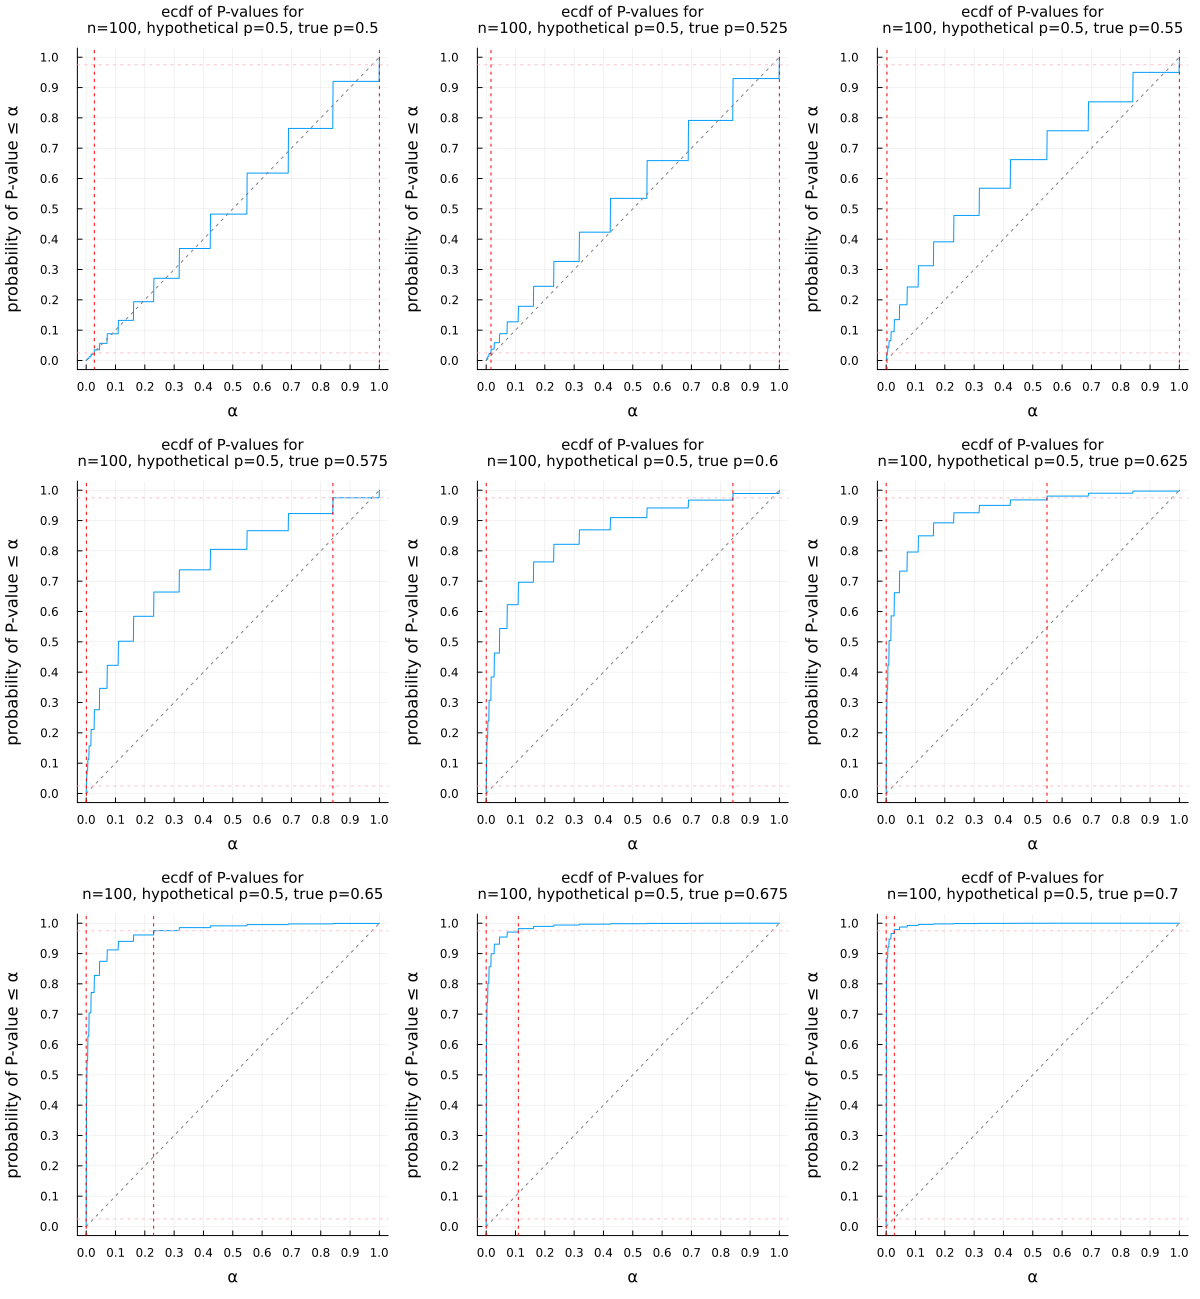

In [5]:
PP = []
n = 100
p = 0.5
for n in (100,), p₀ in 0.50:0.025:0.70
    P = plot_pvals(n, p, p₀)
    push!(PP, P)
end
plot(PP...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=4Plots.mm)